<a href="https://colab.research.google.com/github/Jingyu0711/dasanxia-ML-assignments/blob/main/%E7%AC%AC%E4%B8%80%E6%AC%A1%E5%B0%8F%E4%BD%9C%E4%B8%9ADDL20220427/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,OneHotEncoder,scale

In [ ]:
from IPython.core.interactiveshell import InteractiveShell #实现在同一个cell中输出多个结果
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负数的负号显示问题

### 创建数据集

In [ ]:
df1=pd.DataFrame(
    [[1.0,2.0,3.0,4.0],
    [5.0,6.0,None,8.0],
    [10.0,11.0,12.0,None,]],columns=['A','B','C','D']
)
df1

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df2=pd.DataFrame(
    [['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']],columns=['color','size','price','classlabel']
)
df2

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


# 1.处理异常值

## 1.1用 Python 的 dropna 删除缺失数据

In [ ]:
df1.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df1.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
# 当一行里所有值都为空时
df1.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# 当一行里具体值小于4个时
df1.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# 如果某列有空值，删除空值所在的这一行
df1.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## 1.2用 sklearn 的 SimpleImputer 填补缺失数据

In [ ]:
# 中位数
imputed_data = SimpleImputer(strategy='median').fit_transform(df1.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
# 众数
imputed_data = SimpleImputer(strategy='most_frequent').fit_transform(df1.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  3.,  8.],
       [10., 11., 12.,  4.]])

In [ ]:
# 中值
imputed_data = SimpleImputer(strategy='mean').fit_transform(df1.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# 2.特征转化

## 2.1序数编码

In [ ]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1,
}
df2['size'] = df2['size'].map(size_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [ ]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df2['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## 2.2独热编码

### 方法一

In [ ]:
x = df2[['color','size','price']].values
x

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [ ]:
x[:,0] = LabelEncoder().fit_transform(x[:,0])
x

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [ ]:
ct = ColumnTransformer([('color',OneHotEncoder(),[0])],remainder='passthrough')
x = ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [ ]:
'''
例：
X = [['Male', 1], ['Female', 3], ['Female', 2]]

enc = OneHotEncoder(sparse=False).fit(X)
enc.transform([['Female', 1], ['Male', 2]])
#  drop the first column for each feature
drop_enc = OneHotEncoder(drop='first',sparse=False).fit(X)
drop_enc.transform([['Female', 1], ['Male', 2]])
# drop a column for feature only having 2 categories
drop_binary_enc = OneHotEncoder(drop='if_binary',sparse=False).fit(X)
drop_binary_enc.transform([['Female', 1], ['Male', 2]])
'''

"\n例：\nX = [['Male', 1], ['Female', 3], ['Female', 2]]\n\nenc = OneHotEncoder(sparse=False).fit(X)\nenc.transform([['Female', 1], ['Male', 2]])\n#  drop the first column for each feature\ndrop_enc = OneHotEncoder(drop='first',sparse=False).fit(X)\ndrop_enc.transform([['Female', 1], ['Male', 2]])\n# drop a column for feature only having 2 categories\ndrop_binary_enc = OneHotEncoder(drop='if_binary',sparse=False).fit(X)\ndrop_binary_enc.transform([['Female', 1], ['Male', 2]])\n"

### 方法二

In [ ]:
pd.get_dummies(df2[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# 3.特征缩放

原因：
1、数量级的差异将导致量级较大的属性占据主导地位
2、数量级的差异将导致迭代收敛速度减慢
3、依赖于样本距离的算法对于数据的数量级非常敏感

好处：
1、提升模型的精度：在机器学习算法的目标函数中使用的许多元素（例如支持向量机的 RBF 内核或线性模型的 l1 和 l2 正则化)，都是假设所有的特征都是零均值并且具有同一阶级上的方差。如果某个特征的方差比其他特征大几个数量级，那么它就会在学习算法中占据主导位置，导致学习器并不能像我们期望的那样从其他特征中学习
2、提升收敛速度：对于线性模型来说，数据归一化后，寻找最优解的过程明显会变得平缓，更容易正确地收敛到最优解

一般而言，决策树类算法不需要预处理数值特征。

适用场景：
基于距离的算法;算法用到了梯度下降。

[API：sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

[对红酒数据集进行特征缩放](https://so.csdn.net/so/search?spm=1001.2101.3001.4498&q=%E5%AF%B9%E7%BA%A2%E9%85%92%E6%95%B0%E6%8D%AE%E9%9B%86%E8%BF%9B%E8%A1%8C%E7%89%B9%E5%BE%81%E7%BC%A9%E6%94%BE&t=&u=)

[案例：红酒数据集分析](https://blog.csdn.net/qq_42374697/article/details/108073110?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165094654716781667865966%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165094654716781667865966&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-4-108073110.142^v9^pc_search_result_control_group,157^v4^control&utm_term=%E7%BA%A2%E9%85%92%E6%95%B0%E6%8D%AE%E9%9B%86%E7%95%99%E5%87%BA%E6%B3%95%E5%88%92%E5%88%86%E6%95%B0%E6%8D%AE%E9%9B%86&spm=1018.2226.3001.4187)

### 用pandas的read_csv加载.data数据集

In [ ]:
df3 = pd.read_csv('wine.data',header=None)
# 酒精、苹果酸、灰、灰的碱度、镁、总酚、黄酮类化合物、
# 非黄烷类酚类、原花青素、色彩强度、色调、稀释酒OD280/OD315、脯氨酸
df3.columns = ['Class label','Alcohol',
               'Malic acid','Ash',
               'Alcalinity of ash','Magnesium',
               'Total phenols','Flavanoids',
               'Nonflavanoid phenols','Proanthocyanins',
               'Color intensity','Hue',
               'OD280/OD315 of diluted wines','Proline']
df3.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df3.info() # 发现没有缺失值
df3.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

,count,mean,std,min,25%,50%,75%,max
Class label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


## 3.1数据可视化，观察， 了解每个特征的数据分布

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Class label')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Alcohol')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Malic acid')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Ash')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Alcalinity of ash')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Magnesium')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Total phenols')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Flavanoids')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Nonflavanoid phenols')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Proanthocyanins')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Color intensity')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Hue')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'OD280/OD315 of diluted wines')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Proline')

Text(0, 0.5, 'Frequency')

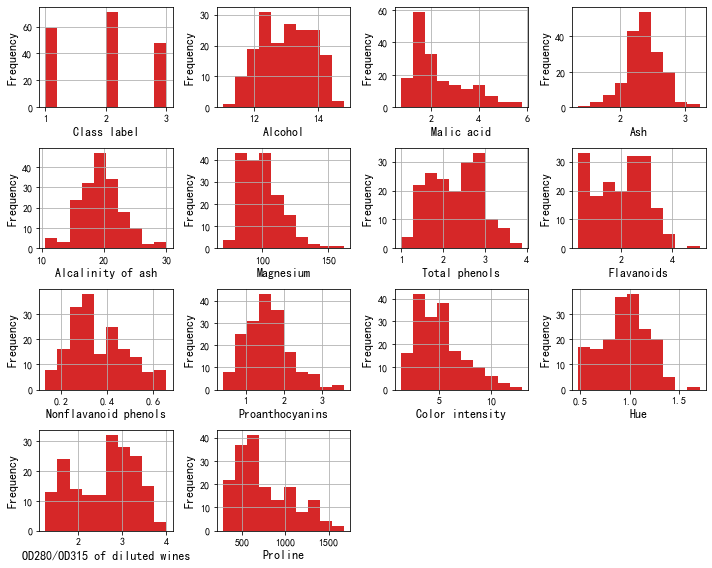

In [ ]:
color = sns.color_palette()# 设置调色板
fig = plt.figure(figsize = (10,8))

# !!!以下动态方法我没想到
column= df3.columns.tolist()
for i in range(14):
    plt.subplot(4,4,i+1)
    df3[column[i]].hist(bins = 10,color = color[3])
    plt.xlabel(column[i],fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
plt.tight_layout()

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Class label')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Alcohol')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Malic acid')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Ash')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Alcalinity of ash')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Magnesium')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Total phenols')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Flavanoids')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Nonflavanoid phenols')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Proanthocyanins')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Color intensity')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Hue')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'OD280/OD315 of diluted wines')

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Proline')

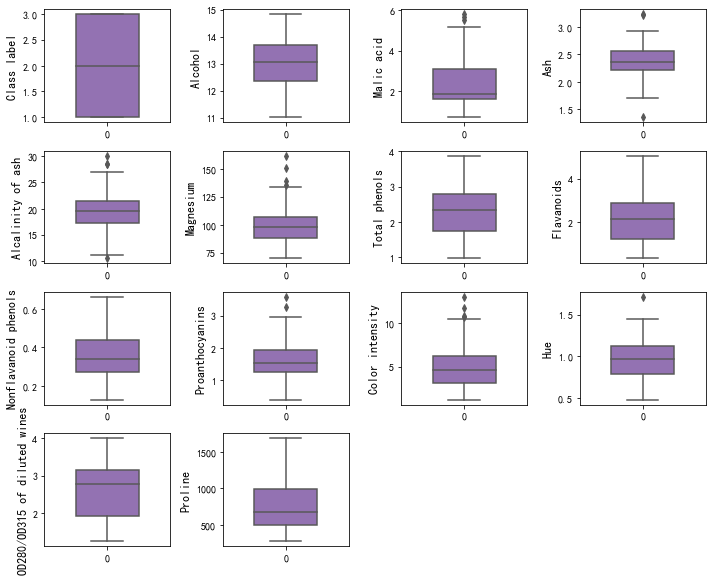

In [ ]:
fig = plt.figure(figsize = (10,8))
for i in range(14):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df3[column[i]],orient = 'x',width = 0.5,color = color[4])
    plt.ylabel(column[i],fontsize = 12)
plt.tight_layout()

基于对以上图像的观察，我将对属性2-6进行归一化，对剩下的属性进行标准化

In [ ]:
X, y = df3.iloc[:, 1:], df3.iloc[:, 0]

# “留出法”划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) # 30%为测试集

## 3.2归一化

### 方法一：min-max normalization

适用范围：
对输出范围有要求；
数据较为稳定，不存在极端的最大最小值；
在不涉及距离度量、协方差计算或数据不符合正态分布的时候，可以使用该方法

In [ ]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### 方法二：Mean normalization

适用范围：矩阵分解

[光谱预处理算法](https://blog.csdn.net/Echo_Code/article/details/121202636?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165098659816782390584181%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165098659816782390584181&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-121202636-null-null-2~all~first_rank_ecpm_v1~rank_v31_ecpm-1-121202636.142^v9^pc_search_result_control_group,157^v4^control&utm_term=def+MeanScaler%28%29&spm=1018.2226.3001.4187)——仅供思维发散

In [ ]:
maximums, minimums, mean = X_train.max(axis=0), X_train.min(axis=0), X_train.mean(axis=0)

for i in range(13):
    X_train.values[:, i] = (X_train.values[:, i] - mean[i]) / (maximums[i] - minimums[i])

### 方法三：Scaling to unit length

每个组件除以向量的欧几里德长度

In [ ]:
preprocessing.Normalizer(norm='l2’, copy=True)
preprocessing.normalize(X, norm='l2’, axis=1, copy=True, return_norm=False)

# norm：'l1','l2',或'max',可选，默认='l2'
# copy：可选，默认=True

SyntaxError: EOL while scanning string literal (<ipython-input-28-bca488e68920>, line 1)

## 3.3标准化/Z-score normalization

### 方法一

适用范围：
SVM、LR、神经网络

数据本身服从正态分布；
最大值和最小值未知，或有超出取值范围的离群数据；
在分类、聚类算法中需要使用距离来度量相似性、或者使用PCA（主成分析）技术进行降维时，使用该方法表现更好

In [ ]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### 方法二（与方法一效果一样，一般不用这个）

In [ ]:
df_train['feature'] = scale(df_train['feature'])

NameError: name 'df_train' is not defined

## 标准化、归一化效果对比

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Alcohol and Malic Acid content of the wine dataset')

Text(0.5, 0, 'Alcohol')

Text(0, 0.5, 'Malic Acid')

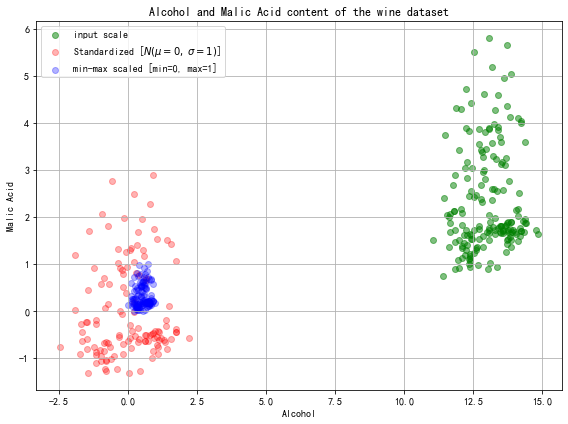

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(df3['Alcohol'], df3['Malic acid'], color='green', label='input scale', alpha=0.5)
plt.scatter(X_train_std[:,0], X_train_std[:,1], color='red', label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()

由图可知，
标准化后，数据分布形状及形状大小不变，但数据值整体变小；
归一化后，数据分布形状不变但明显变小，数据值整体变小且更集中。

# 4.划分数据集

[数据集划分的三种常见方式](https://blog.csdn.net/weixin_38753213/article/details/112690712?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165094610116782350910337%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165094610116782350910337&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-1-112690712.142^v9^pc_search_result_control_group,157^v4^control&utm_term=%E5%88%92%E5%88%86%E6%95%B0%E6%8D%AE%E9%9B%86&spm=1018.2226.3001.4187)

### 方法一：留出法(hold-out)

优点：
用几乎所有的数据进行训练，然后用一个数据进行测试。
确定性:实验没有随机因素，整个过程是可重复的。无论测多少次结果都一样。

缺点：
计算时间长、分层问题

In [ ]:
# 将70%的样本作为训练集，30%作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

[python sklearn模型中random_state参数的意义](https://blog.csdn.net/xiaohutong1991/article/details/107923970?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.pc_relevant_default&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.pc_relevant_default&utm_relevant_index=1)

[对random_state参数的理解](https://blog.csdn.net/az9996/article/details/86616668?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165094166116781683972204%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165094166116781683972204&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-86616668.142^v9^pc_search_result_control_group,157^v4^control&utm_term=random_state&spm=1018.2226.3001.4187)

### 方法二：交叉验证法（Cross-Validation）

优点：
1：用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
2：解决数据集的数据量不够大问题。
3：解决参数调优问题

简单交叉验证（HoldOut检验）、cv（k-fold交叉验证）(常用)、留一法/留P法

如果模型同时需要对多个参数进行优化会用到另一种方法——网格搜索法[GridSearchCV](https://blog.csdn.net/weixin_41988628/article/details/83098130)

[几种交叉验证法](https://blog.csdn.net/yawei_liu1688/article/details/79138202)

In [ ]:
# 交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  #一个简单的模型，只有K一个参数，类似K-means

k_range = range(1,31)
cv_scores = [] # 用来放每个模型的评价值
for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    # cv：每次测试折数，默认为3;
    # scoring：评价指标,默认'f1_macro’。
    cv_scores.append(scores.mean())

plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')#通过图像选择最好的参数
plt.show()

best_knn = KNeighborsClassifier(n_neighbors=1)# 选择最优的K=1传入模型
best_knn.fit(X_train,y_train)#训练模型
print(best_knn.score(X_test,y_test))#看看评分

[随机森林 + 十折交叉验证](https://blog.csdn.net/m0_45184077/article/details/114445687?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165094654716781667865966%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165094654716781667865966&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-8-114445687.142%5Ev9%5Epc_search_result_control_group,157%5Ev4%5Econtrol&utm_term=%E7%BA%A2%E9%85%92%E6%95%B0%E6%8D%AE%E9%9B%86%E7%95%99%E5%87%BA%E6%B3%95%E5%88%92%E5%88%86%E6%95%B0%E6%8D%AE%E9%9B%86&spm=1018.2226.3001.4187)

### 方法三：自助法（bootstrapping）

当数据量很小时，我们可以使用留一法，但这种方法会造成计算复杂度过高。此时，我们引入自助法来解决问题。

优点：在数据集较小、难以有效划分训练/测试集时很有用；能从初始数据集中产生多个不同的训练集，这对集成学习等方法有很大的好处。

缺点：产生的数据集改变了初始数据集的分布，这会引入估计偏差。

In [ ]:
from random import sample
X_train = X.sample(n=178,replace=True,random_state=1)
X_test = X.append(X_train).drop_duplicates(keep=False)# 保留不重复的行
y_train = y.sample(n=178,replace=True,random_state=1)
y_test = y.append(y_train).drop_duplicates(keep=False)

随机选取若干行

DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)

n:要抽取的行数;
frac:抽取行的比例;
replace:是否为有放回抽样;
weights:字符索引或概率数组;
random_state:None/1-取得的数据是否可重复;
axis:0/1-抽取行/列

### 拓展：利用现有红酒数据集做一个回归分类模型

In [ ]:
# 主成分分析法（只有标准化后用）+ 逻辑回归分类
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2) # 保留2个主成分
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
acc = lr.score(X_test_pca, y_test) # 返回预测准确度accuracy
print("准确度为:",acc)

plot_decision_regions(X_train_pca, y_train, clf=lr)# classifier
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

LogisticRegression()

准确度为: 0.9814814814814815


ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

[贝叶斯分类器](https://blog.csdn.net/qq_43498798/article/details/116002068?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165060388616782246468094%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165060388616782246468094&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-1-116002068.142^v9^pc_search_result_control_group,157^v4^control&utm_term=%E5%AF%B9%E7%BA%A2%E9%85%92%E6%95%B0%E6%8D%AE%E9%9B%86%E8%BF%9B%E8%A1%8C%E7%89%B9%E5%BE%81%E7%BC%A9%E6%94%BE&spm=1018.2226.3001.4187)